# Assignment 5

Build and compare two different varying-coefficient hierarchical normal regression models for the log prices.
**(a)** Let $\hat\beta^{(j)}_1$ and $\hat\beta^{(j)}_2$ be the ordinary least squares estimates of $\beta^{(j)}_1$ and $\beta^{(j)}_2$,estimate for each stock seperately. Average $\hat\beta^{(j)}_1=3.04027260511673$, $\hat\beta^{(j)}_2 = 0.00814822142954259$

In [7]:
stock <- read.table("stockprices.txt", header=TRUE)

In [8]:
head(stock)

Symbol,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
FOMX,11.23,10.08,9.89,5.00,4.25,4.41,4.65,5.27,5.19,5.53,6.12,5.70
PENN,13.90,13.70,14.63,18.59,18.60,19.38,21.46,20.19,22.24,23.29,26.26,28.94
HTLD,20.54,20.73,21.04,20.05,20.24,19.51,20.95,21.23,22.19,25.15,21.29,22.84
CIBR,19.67,20.85,21.18,21.77,21.46,22.03,21.77,21.30,21.71,21.95,22.43,22.60
ZYNE,16.39,17.38,23.00,20.24,20.98,18.69,17.13,14.50,6.31,8.88,9.70,13.69
AEGN,24.09,23.42,24.90,22.94,22.19,19.92,22.02,24.04,21.72,23.27,23.59,27.77


In [14]:
#log transformation
logstock<-apply(stock[,c(2:13)], 2, function(x) log(x))

In [15]:
logstock

Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2.418589,2.310553,2.291524,1.609438,1.446919,1.483875,1.536867,1.662030,1.646734,1.710188,1.811562,1.740466
2.631889,2.617396,2.683074,2.922624,2.923162,2.964242,3.066191,3.005187,3.101892,3.148024,3.268047,3.365225
3.022374,3.031582,3.046425,2.998229,3.007661,2.970927,3.042139,3.055415,3.099642,3.224858,3.058237,3.128513
2.979095,3.037354,3.053057,3.080533,3.066191,3.092405,3.080533,3.058707,3.077773,3.088767,3.110399,3.117950
2.796671,2.855320,3.135494,3.007661,3.043570,2.927989,2.840831,2.674149,1.842136,2.183802,2.272126,2.616666
3.181797,3.153590,3.214868,3.132882,3.099642,2.991724,3.091951,3.179719,3.078233,3.147165,3.160823,3.323956
3.766997,3.737670,3.787593,3.750680,3.823192,3.781914,3.861782,3.838376,3.777348,3.817712,3.874321,3.814410
2.900872,2.841415,2.848392,2.963209,3.080073,3.002211,3.061052,2.862772,2.837323,2.865624,2.882004,3.069912
3.232779,3.175968,3.097837,3.058707,2.931194,2.931194,2.995732,2.621039,2.721295,2.944439,3.196630,3.297687
3.410818,3.524594,3.559340,3.687378,3.821661,3.758872,3.856510,3.949319,3.914819,4.025530,4.162470,4.159664


In [16]:
x_bar=mean(c(1:12))

In [32]:
#Simple least squares analyses can guide choice of priors and initialization:
betahat <- matrix(NA, nrow(logstock), 2)

In [34]:
a=rbind(matrix(1:12))

In [39]:
for(j in 1:nrow(logstock)){
   betahat[j,] <- lsfit(a - x_bar, logstock[j,])$coef
    }

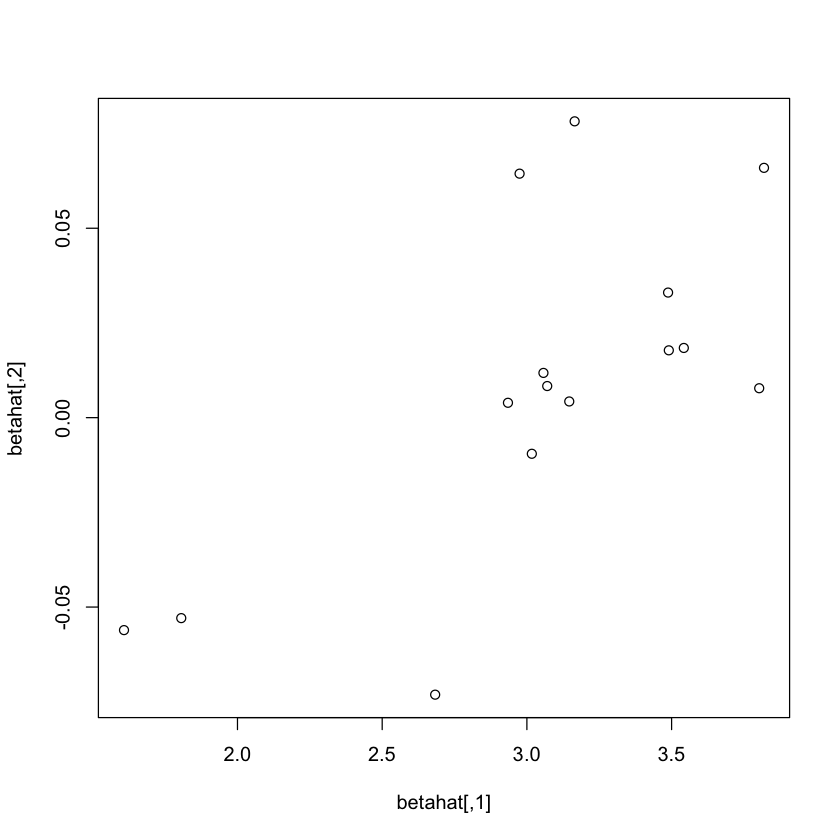

In [45]:
#produce a scatter plot of the pairs(beta_hat_1,beta_hat_2)
plot(betahat)

In [40]:
#sample average beta_hat_1 and beta_hat_2
apply(betahat, 2, mean)

[1] 3.040272605 0.008148221

In [42]:
var(betahat)

0.39929945,0.019095053
0.01909505,0.001932259


**(b)** Consider the bivariate prior
![title](model1.png)
(i)List an appropriate JAGS model.Use multiple chains with overdispersed starting points, check convergence and monitor $\mu_\beta$, $\Sigma_\beta$,$\sigma^2_y$ and $\rho$ to obtain e↵ective sample sizes of at least 4000 for each parameter.

In [ ]:
#stockprice.bug
'
data {
  dimY <- dim(logprice)
  monthcent <- month - mean(month)
} model {
  for (j in 1:dimY[1]) {
    for (i in 1:dimY[2]) {
      logprice[j,i] ~ dnorm(beta[1,j] + beta[2,j]*monthcent[i], sigmasqyinv)
    }
    beta[1:2,j] ~ dmnorm(mubeta, Sigmabetainv)
  }
  mubeta ~ dmnorm(mubeta0, Sigmamubetainv)
  Sigmabetainv ~ dwish(2*Sigma0, 2)
  sigmasqyinv ~ dgamma(0.0001, 0.0001)
  Sigmabeta <- inverse(Sigmabetainv)
  rho <- Sigmabeta[1,2] / sqrt(Sigmabeta[1,1] * Sigmabeta[2,2])
  sigmasqy <- 1/sigmasqyinv
}
'

In [55]:
d1 <- list(logprice = logstock,
           month = c(1:12),
           mubeta0 = c(0, 0),
           Sigmamubetainv = rbind(c(0.000001, 0),
                                  c(0, 0.000001)),
           Sigma0 = rbind(c(1, 0),c(0, 0.01)))

In [56]:
#Set up initializations (extreme relative to data) for 4 chains:
#We'll need to initialize the top level nodes which are 
#sigmasqyinv, mubeta, and then Sigmabetainv
inits1 <- list(list(sigmasqyinv = 10, mubeta = c(1000, 1000),
                    Sigmabetainv = rbind(c(100, 0),
                                         c(0, 1000))),
               list(sigmasqyinv = 0.001, mubeta = c(-1000, 1000),
                    Sigmabetainv = rbind(c(100, 0),
                                         c(0, 1000))),
               list(sigmasqyinv = 10, mubeta = c(1000, -1000),
                    Sigmabetainv = rbind(c(0.001, 0),
                                         c(0, 0.001))),
               list(sigmasqyinv = 0.001, mubeta = c(-1000, -1000),
                    Sigmabetainv = rbind(c(0.001, 0),
                                         c(0, 0.001))))

In [53]:
library(rjags)

Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


In [57]:
m1 <- jags.model("stockprice.bug", d1, inits1, n.chains=4, n.adapt=1000)

Compiling data graph
   Resolving undeclared variables
   Allocating nodes
   Initializing
   Reading data back into data table
Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 180
   Unobserved stochastic nodes: 18
   Total graph size: 639

Initializing model



In [59]:
update(m1, 1000)  # burn-in

In [60]:
x1 <- coda.samples(m1, c("mubeta","Sigmabeta","sigmasqy"), n.iter=2000)

In [61]:
#check convergence
gelman.diag(x1, autoburnin=FALSE, multivariate=FALSE)

Potential scale reduction factors:

               Point est. Upper C.I.
Sigmabeta[1,1]       1.29       1.72
Sigmabeta[2,1]       1.25       1.44
Sigmabeta[1,2]       1.25       1.44
Sigmabeta[2,2]       1.18       1.38
mubeta[1]            7.40      18.89
mubeta[2]          335.57     863.17
sigmasqy            12.05      69.30


In [62]:
#more burn in
update(m1, 35000)

In [70]:
x1 <- coda.samples(m1, c("mubeta","Sigmabeta","sigmasqy","rho"), n.iter=2000)

In [71]:
#check convergence again
gelman.diag(x1, autoburnin=FALSE, multivariate=FALSE)

Potential scale reduction factors:

               Point est. Upper C.I.
Sigmabeta[1,1]          1          1
Sigmabeta[2,1]          1          1
Sigmabeta[1,2]          1          1
Sigmabeta[2,2]          1          1
mubeta[1]               1          1
mubeta[2]               1          1
rho                     1          1
sigmasqy                1          1


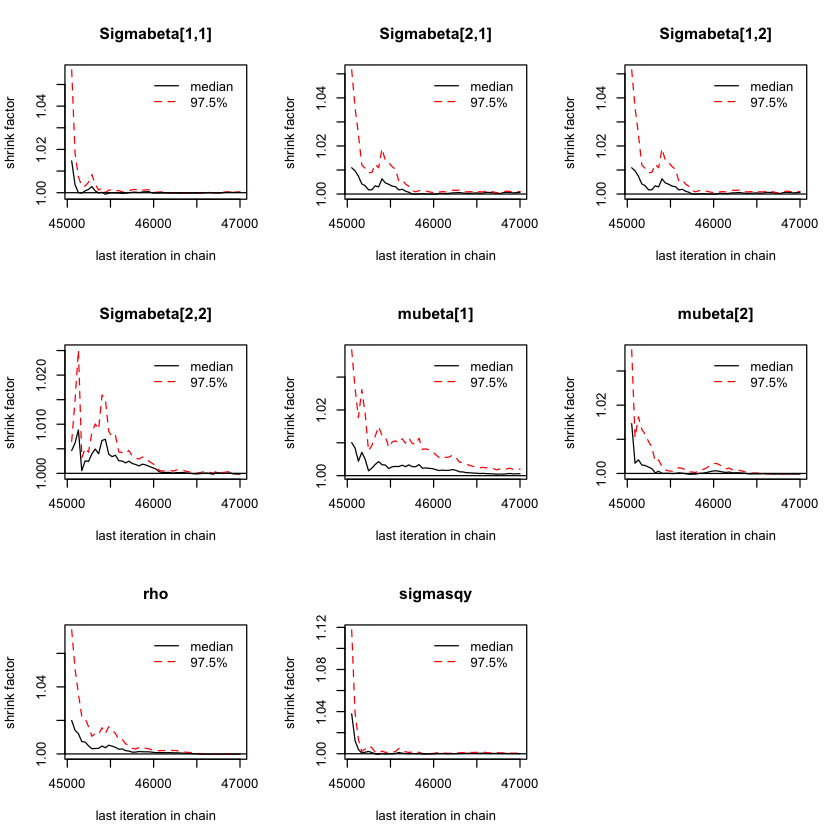

In [72]:
gelman.plot(x1, autoburnin=FALSE)

In [73]:
#effective sample size for each parameter are over 4000
effectiveSize(x1[,c("mubeta[1]","mubeta[2]","Sigmabeta[1,1]",
                    "Sigmabeta[1,2]","Sigmabeta[2,2]","sigmasqy","rho")])

mubeta[1]      mubeta[2] Sigmabeta[1,1] Sigmabeta[1,2] Sigmabeta[2,2] 
      8143.132       7152.671       6952.430       6623.952       6411.402 
      sigmasqy            rho 
      5821.228       6621.033

(ii)Display the coda summary of the results for the monitored parameters.

In [74]:
summary(x1[,c("mubeta[1]","mubeta[2]","Sigmabeta[1,1]","Sigmabeta[1,2]",
               "Sigmabeta[2,2]","sigmasqy","rho")])


Iterations = 45001:47000
Thinning interval = 1 
Number of chains = 4 
Sample size per chain = 2000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                   Mean       SD  Naive SE Time-series SE
mubeta[1]      3.040569 0.195390 2.185e-03      2.165e-03
mubeta[2]      0.008326 0.015804 1.767e-04      1.869e-04
Sigmabeta[1,1] 0.581128 0.249652 2.791e-03      3.002e-03
Sigmabeta[1,2] 0.020176 0.015096 1.688e-04      1.864e-04
Sigmabeta[2,2] 0.003610 0.001567 1.751e-05      1.964e-05
sigmasqy       0.020722 0.002412 2.696e-05      3.164e-05
rho            0.427840 0.211701 2.367e-03      2.604e-03

2. Quantiles for each variable:

                    2.5%       25%      50%      75%   97.5%
mubeta[1]       2.650844  2.916456 3.038099 3.167385 3.42982
mubeta[2]      -0.023268 -0.001753 0.008277 0.018560 0.03995
Sigmabeta[1,1]  0.274152  0.412293 0.527834 0.684293 1.21348
Sigmabeta[1,2] -0.001711  0.010613 0.017662 0.026784 0.0568

（iii）an approximate 95% central posterior credible interval for the correlation
parameter rho is **(-0.042195,0.77616)**. Below shows the graph of its (estimated) posterior density.

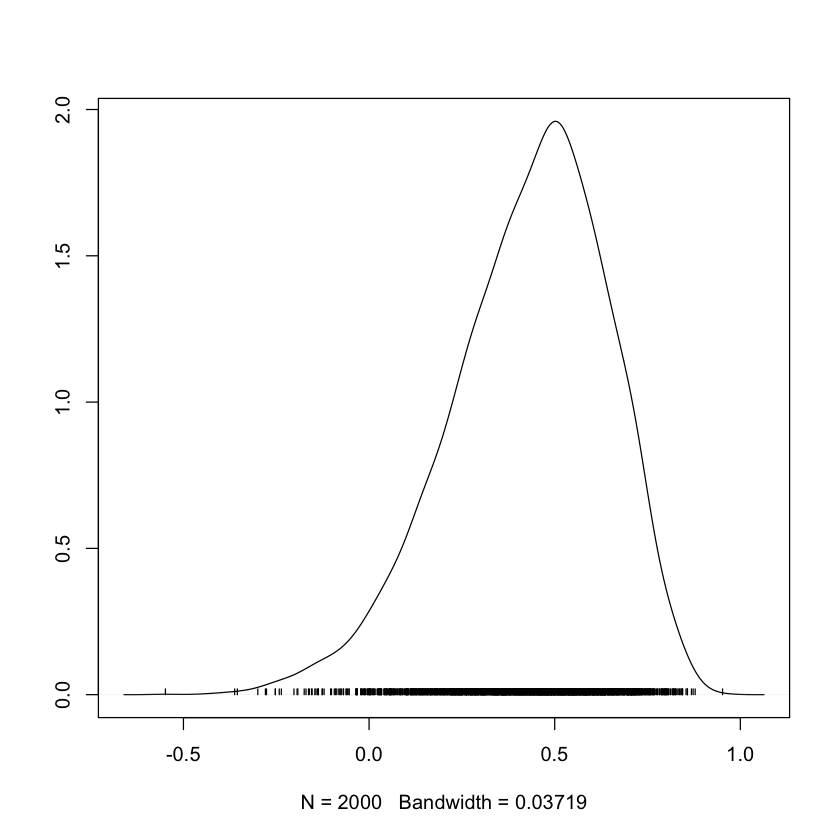

In [75]:
#produce a graph of its (estimated) posterior density
densplot(x1[,c("rho")])

**(iv)** Approximate the posterior probability that rho > 0, based on the result showing below, the probability is 0.965125.   
Also, compute the Bayes factorfavoring rho>0versus rho<0. Given that rho>0 and rho<0 have equal prior probability, therefore

$$
\begin{aligned}
\operatorname{BF}(H_2;H_1) = \text{posterior odds favoring} \space H_2 = \frac{0.965125}{0.034875} = 27.673835125448
\end{aligned}
$$

Result shows positive data evidence for H2 vs. H1

In [87]:
#posterior probability that rho > 0
post.samp <- as.matrix(x1)
mean(as.matrix(x1[,c("rho")])>0)

[1] 0.965125

In [88]:
mean(as.matrix(x1[,c("rho")])<0)

[1] 0.034875

In [89]:
0.965125/0.034875

[1] 27.67384

**(v)** The model implies that, over the 11 months from the first time point to the last, the (population) median stock price should have changed by a factor of

$$
\begin{aligned}
e^{11\mu_{\beta_2}}
\end{aligned}
$$

So the log price change should be $11\mu_{\beta_2}$, because mu_beta_2 approximate 95% central posterior credible interval is (-0.023268,0.03995), so the log price change 95% central posterior credible interval is (-0.255948,0.43945), the stock price change 95% central posterior credible interval is about (0.774,1.552), the change in the NASDAQ composite(factor of 1.261) is within this range

In [92]:
exp(-0.023268*11)

[1] 0.7741822

In [93]:
exp(0.03995*11)

[1] 1.551853

**(vi)** Using rjags function dic.samples to compute the effective number of parameters **(31)** and Plummer's DIC **(-157.4)**.

In [94]:
#Compute JAGS version of DIC:
dic.samples(m1,100000)

Mean deviance:  -188.1 
penalty 30.62 
Penalized deviance: -157.4 

**(c)** Now consider a different model with “univariate” hyperpriors for the model coecients, which
do not allow for a coefficient correlation parameter:  

(i)Draw a complete DAG for this new model.
![title](DAG.png)

(ii)List an appropriate JAGS model.

In [ ]:
#stockprice2.bug
'
data {
  dimY <- dim(logprice)
  monthcent <- month - mean(month)
} model {
  for (j in 1:dimY[1]) {
    for (i in 1:dimY[2]) {
      logprice[j,i] ~ dnorm(beta1[j] + beta2[j]*monthcent[i], sigmasqyinv)
    }
    beta1[j]~ dmnorm(mubeta1, Sigmasqbetainv1)
    beta2[j]~ dmnorm(mubeta2, Sigmasqbetainv2)
  }
  mubeta1 ~ dmnorm(0,0.000001)
  mubeta2 ~ dmnorm(0,0.000001)
  sigmabeta1 ~ dunif(0,1000)
  sigmabeta2 ~ dunif(0,1000)
  Sigmasqbetainv1 <- 1/sigmabeta1^2
  Sigmasqbetainv2 <- 1/sigmabeta2^2
  sigmasqyinv ~ dgamma(0.0001, 0.0001)
  sigmasqy <- 1/sigmasqyinv
  sigmasqbeta1<-inverse(Sigmasqbetainv1)
  sigmasqbeta2<-inverse(Sigmasqbetainv2)
}
'

In [174]:
d2 <- list(logprice = logstock,
           month = c(1:12))

In [175]:
#Set up initializations (extreme relative to data) for 4 chains:
inits2 <- list(list(sigmasqyinv = 10, mubeta1 = 1000,mubeta2 = 1000,
                    sigmabeta1 = 100,sigmabeta2 = 100),
               list(sigmasqyinv = 0.001, mubeta1 = 1000,mubeta2 = 1000,
                    sigmabeta1 = 100,sigmabeta2 = 100),
               list(sigmasqyinv = 10, mubeta1 = 0.1,mubeta2 = 0.1,
                    sigmabeta1 = 0.001,sigmabeta2 = 0.001),
               list(sigmasqyinv = 0.001, mubeta1 = 0.1,mubeta2 = 0.1,
                    sigmabeta1 = 0.001,sigmabeta2 = 0.001))

In [191]:
m2 <- jags.model("stockprice2.bug", d2, inits2, n.chains=4, n.adapt=1000)

Compiling data graph
   Resolving undeclared variables
   Allocating nodes
   Initializing
   Reading data back into data table
Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 180
   Unobserved stochastic nodes: 35
   Total graph size: 614

Initializing model



In [192]:
update(m2, 1000)

In [193]:
x2 <- coda.samples(m2, c("mubeta1","mubeta2","sigmasqbeta1",
                         "sigmasqbeta2","sigmasqy"), n.iter=2000)

In [194]:
gelman.diag(x2, autoburnin=FALSE, multivariate=FALSE)

Potential scale reduction factors:

             Point est. Upper C.I.
mubeta1               1          1
mubeta2               1          1
sigmasqbeta1          1          1
sigmasqbeta2          1          1
sigmasqy              1          1


In [208]:
update(m2, 30000)

In [211]:
x2 <- coda.samples(m2, c("mubeta1","mubeta2","sigmasqbeta1",
                         "sigmasqbeta2","sigmasqy"), n.iter=3000)

In [212]:
gelman.diag(x2, autoburnin=FALSE, multivariate=FALSE)

Potential scale reduction factors:

             Point est. Upper C.I.
mubeta1               1          1
mubeta2               1          1
sigmasqbeta1          1          1
sigmasqbeta2          1          1
sigmasqy              1          1


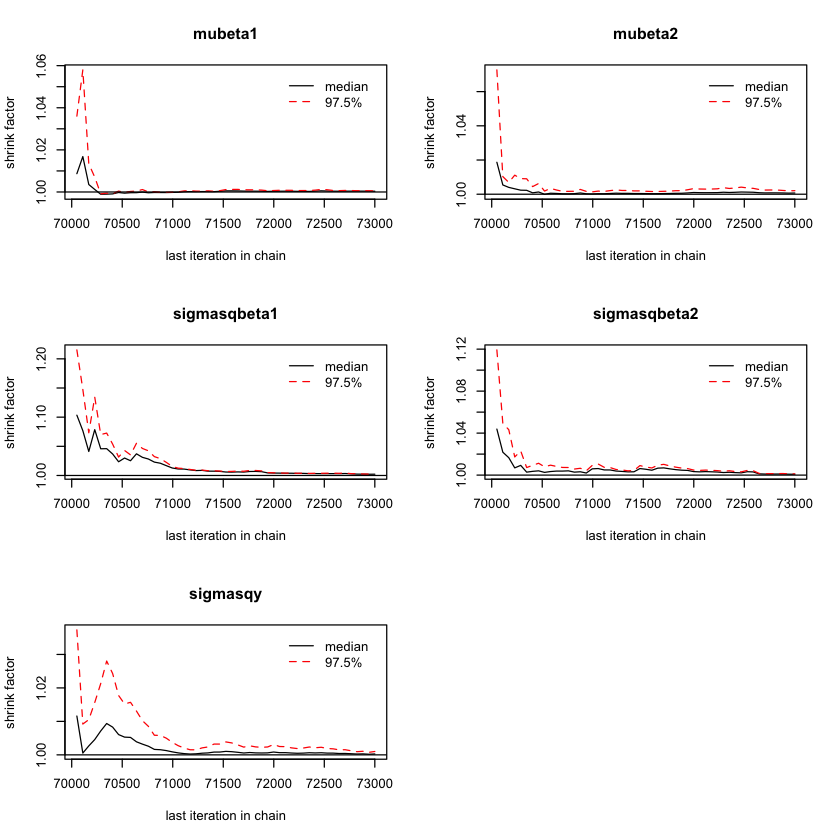

In [213]:
gelman.plot(x2, autoburnin=FALSE)

In [214]:
#effective sample size are over 4000 for each parameter
effectiveSize(x2[,c("mubeta1","mubeta2","sigmasqbeta1",
                    "sigmasqbeta2","sigmasqy")])

mubeta1      mubeta2 sigmasqbeta1 sigmasqbeta2     sigmasqy 
   12000.000    10174.899     4048.011     4349.083     8469.182

(iii)Display the coda summary of the results for the monitored parameters.

In [215]:
summary(x2[,c("mubeta1","mubeta2","sigmasqbeta1",
              "sigmasqbeta2","sigmasqy")])


Iterations = 70001:73000
Thinning interval = 1 
Number of chains = 4 
Sample size per chain = 3000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                 Mean       SD  Naive SE Time-series SE
mubeta1      3.040794 0.186823 1.705e-03      1.706e-03
mubeta2      0.008192 0.012709 1.160e-04      1.266e-04
sigmasqbeta1 0.510667 0.242443 2.213e-03      3.864e-03
sigmasqbeta2 0.002290 0.001138 1.039e-05      1.803e-05
sigmasqy     0.020834 0.002440 2.227e-05      2.658e-05

2. Quantiles for each variable:

                   2.5%       25%      50%      75%    97.5%
mubeta1       2.6745174 2.9195852 3.039982 3.159417 3.409933
mubeta2      -0.0169728 0.0001651 0.008254 0.016378 0.033218
sigmasqbeta1  0.2244043 0.3513431 0.453801 0.604459 1.140235
sigmasqbeta2  0.0009403 0.0015313 0.002037 0.002723 0.005228
sigmasqy      0.0165785 0.0190965 0.020689 0.022349 0.026160


(iv)In this model

$$
\begin{aligned}
e^{11\mu_{\beta_2}}
\end{aligned}
$$

because mu_beta_2 approximate 95% central posterior credible interval is (-0.0169728,0.033218), so the stock price change 95% central posterior credible interval is about **(0.060,1.441)**, the change in the NASDAQ composite(factor of 1.261) is within this range, however, compared to the last model(0.774,1.552), this result range of this model is too wide to have predictive power.

In [216]:
exp(-0.255948*11)
exp(0.033218*11)

[1] 0.05987909

[1] 1.441087

(v) Compare the (Plummer’s) DIC values for this model and the previous one.As the result showing below, it is the same as the previous one.

In [217]:
#Compute JAGS version of DIC:
dic.samples(m2,100000)

Mean deviance:  -187.5 
penalty 30.54 
Penalized deviance: -157 

**(d)**  
(i)I think it is possible that variability in log-price (volatility) depends on the stock. The model could use different $\sigma^{(j)}_y$ for j=1, . . . , 15

(ii)It is possible that there are time-series correlations that are not captured by the simple linear regression model. If this is the case, it violates the modele assumption that $y_{i j}$ are independently distributed for both $y_{\bullet j}$ and $y_{i \bullet}$, because in time-series correlations, $y_{\bullet j}$ will not be independent.